# Forum Group Discussion: Object Detection

Sabtu, 10 Mei 2025

## Anggota Tim Competition


* Danu Tirta
* Muhammad Faqih Hakim
* Nazwa Akilla Zahra

## Informasi Dataset

Dataset **Indonesia Traffic Sign Dataset** yang tersedia di platform Kaggle dan Roboflow Universe. Dataset ini berisi gambar-gambar rambu lalu lintas di Indonesia yang telah dianotasi untuk digunakan dalam deteksi objek.

Dataset ini terdiri dari lebih dari 15.000 gambar yang mencakup berbagai jenis rambu lalu lintas yang ditemukan di Indonesia. Setiap gambar telah dilabeli dengan anotasi yang menunjukkan lokasi rambu dalam gambar, yang memungkinkan model untuk dilatih dalam mendeteksi dan mengklasifikasikan berbagai rambu lalu lintas.

## Tahapan Analisis

Proses dilakukan berdasarkan tahapan dalam metode Cross-Industry Process for Data Mining (CRISP-DM), yang mencakup 6 langkah utama:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

## Tahap 1: Business Understanding

Deteksi otomatis rambu lalu lintas sangat penting untuk mendukung keselamatan berkendara, khususnya pada sistem kendaraan otonom dan pemantauan lalu lintas. Salah satu tantangan utama dalam deteksi objek adalah memilih model yang tidak hanya akurat tetapi juga efisien dan ringan agar dapat dijalankan di perangkat yang terbatas sumber daya.

### Instalasi Library yang Dibutuhkan

In [ ]:
!pip install torch torchvision numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Penjelasan:

torch: Digunakan untuk membuat tensor, operasi matematika, serta pelatihan dan inferensi model menggunakan GPU/CPU.

torchvision: Menyediakan alat dan model untuk visi komputer, termasuk transformasi gambar, model pre-trained deteksi objek, dan metrik evaluasi.

numpy: Untuk operasi numerik dan manipulasi array/matriks, digunakan dalam perhitungan bounding box.

scikit-learn: Menyediakan algoritma pembelajaran mesin dan metrik evaluasi seperti average_precision_score untuk mengukur kinerja model.


In [ ]:
!pip install albumentations

Penjelasan: Untuk augmentasi data yang menerapkan transformasi acak pada gambar untuk meningkatkan variasi dan membantu generalisasi model.

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 19.8 MB/s eta 0:00:00


Penjelasan: Untuk perhitungan metrik evaluasi model, seperti Mean Average Precision (mAP) untuk mengukur kinerja deteksi objek pada kode di atas.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data
import os
import torchvision
from torchvision import transforms as T
from torchvision.models.detection import ssdlite320_mobilenet_v3_large
from torchvision.models.detection.ssdlite import SSDLiteClassificationHead
from torchvision.ops import misc as misc_nn_ops
from torchvision.ops import box_iou
from sklearn.metrics import average_precision_score
import numpy as np
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import zipfile
from google.colab import files
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab import files
from PIL import Image, ImageDraw, ImageFont
import time

Penjelasan:

torch: Untuk manipulasi tensor, perhitungan matematis, dan pelatihan model dengan dukungan GPU/CPU.

torch.utils.data: Menyediakan kelas Dataset dan DataLoader untuk mempermudah pengolahan dan pemuatan dataset dalam bentuk batch.

os: Untuk mengelola operasi file dan folder di sistem, seperti memeriksa keberadaan file atau membuat folder.

torchvision: Untuk visi komputer yang menyediakan model pre-trained, transformasi gambar, dan alat lainnya untuk aplikasi deep learning.

torchvision.models.detection: Menyediakan model deteksi objek, seperti ssdlite320_mobilenet_v3_large, serta kelas dan fungsi terkait untuk deteksi objek.

torchvision.ops: Berisi operasi terkait deteksi objek, seperti perhitungan Intersection over Union (IoU) untuk mengevaluasi hasil deteksi.

sklearn.metrics: Menyediakan fungsi untuk mengukur kinerja model, seperti average_precision_score.

numpy (np): Untuk operasi numerik, terutama dalam manipulasi array dan matriks untuk analisis data.

torchmetrics.detection.mean_ap: Untuk menghitung Mean Average Precision (mAP), metrik evaluasi penting dalam deteksi objek untuk mengukur kinerja model.

zipfile: Untuk mengekstrak file ZIP yang berisi dataset atau data lainnya.

google.colab.files: Untuk mengelola file yang diunggah dan diunduh dalam lingkungan Google Colab.

PIL (Image, ImageDraw): Untuk membuka, memanipulasi, dan menyimpan gambar dalam berbagai format. ImageDraw digunakan untuk menggambar di atas gambar, seperti menggambar kotak pembatas.

IPython.display: Untuk menampilkan gambar atau hasil lainnya dalam notebook Jupyter atau Google Colab.

time: Untuk mengakses fungsi terkait waktu, seperti menunda eksekusi program atau mengukur durasi waktu.

## Tahap 2: Data Understanding

Tahap Data Understanding dilakukan untuk mengumpulkan dan menelaah data sebelum pemrosesan lebih lanjut. Data yang digunakan untuk melatih model harus benar-benar dipahami dan divalidasi agar model yang dibangun nantinya dapat memberikan hasil yang maksimal.

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download adityabayhaqie/indonesia-traffic-sign-dataset-yolov11

Dataset URL: https://www.kaggle.com/datasets/adityabayhaqie/indonesia-traffic-sign-dataset-yolov11
License(s): CC-BY-SA-4.0


Penjelasan: Menyiapkan konfigurasi API Kaggle dengan membuat folder .kaggle, menyalin file kaggle.json, mengatur izin aksesnya, lalu mengunduh dataset Indonesia Traffic Sign Dataset YOLOv11 dari Kaggle.

## Tahap 3: Data Preparation

Tahap Data Preparation adalah tahap membangun model deteksi objek. Data yang telah dikumpulkan harus diolah dan disiapkan agar dapat digunakan oleh model dengan benar. Di sini, kita mengekstrak file ZIP dan mempersiapkan dataset untuk proses pelatihan.

In [ ]:
extract_dir = 'dataset/'
os.makedirs(extract_dir, exist_ok=True)

Penjelasan: Membuat folder bernama dataset jika belum ada, dan menyimpannya ke dalam variabel extract_dir sebagai direktori tujuan ekstraksi file.

In [ ]:
zip_file = '/content/indonesia-traffic-sign-dataset-yolov11.zip'
data_zip = zipfile.ZipFile(zip_file, 'r')
data_zip.extractall(extract_dir)
data_zip.close()

Penjelasan: Membuka file ZIP indonesia-traffic-sign-dataset-yolov11.zip, mengekstraknya ke folder dataset, lalu menutup file ZIP setelah proses ekstraksi selesai.

In [ ]:
class YOLODataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform
        self.image_filenames = sorted(os.listdir(image_dir))

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_name = self.image_filenames[idx]
        img_path = os.path.join(self.image_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace(".jpg", ".txt"))

        image = Image.open(img_path).convert("RGB")
        w, h = image.size

        boxes = []
        labels = []
        if os.path.exists(label_path):
            with open(label_path) as f:
                for line in f.readlines():
                    cls, xc, yc, bw, bh = map(float, line.strip().split())
                    xmin = (xc - bw / 2) * w
                    ymin = (yc - bh / 2) * h
                    xmax = (xc + bw / 2) * w
                    ymax = (yc + bh / 2) * h
                    boxes.append([xmin, ymin, xmax, ymax])
                    labels.append(int(cls))

        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels}

        if self.transform:
            image = self.transform(image)

        return image, target

Penjelasan: Mendefinisikan kelas dataset kustom (YOLODataset) untuk memuat dan memproses gambar rambu lalu lintas dan anotasinya (bounding box dan label).

In [ ]:
transform = T.Compose([T.Resize((320, 320)), T.ToTensor()])

Penjelasan: Menerapkan perubahan ukuran gambar dan mengubah gambar menjadi format tensor untuk input model.

In [ ]:
train_dataset = YOLODataset("/content/dataset/train/images", "/content/dataset/train/labels", transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

Penjelasan: Mempersiapkan data pelatihan menggunakan kelas YOLODataset dan membuat DataLoader untuk memasukkan data ke dalam model.

## Tahap 4: Modeling

Di tahap ini, kita membangun dan melatih model deteksi objek menggunakan algoritma Single Shot Multibox Detector (SSD)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Penjelasan: Menentukan apakah GPU tersedia dan menetapkan perangkat untuk pelatihan model.

In [ ]:
num_classes = 41
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(pretrained=True)
model.num_classes = num_classes
model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssdlite320_mobilenet_v3_large_coco-a79551df.pth" to /root/.cache/torch/hub/checkpoints/ssdlite320_mobilenet_v3_large_coco-a79551df.pth
100%|██████████| 13.4M/13.4M [00:00<00:00, 117MB/s] 


SSD(
  (backbone): SSDLiteFeatureExtractorMobileNet(
    (features): Sequential(
      (0): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (2): Hardswish()
        )
        (1): InvertedResidual(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
              (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
            )
            (1): Conv2dNormActivation(
              (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
            )
          )
        )
        (2): Invert

Penjelasan: Memuat model SSDLite MobileNet V3 yang telah dilatih sebelumnya dan memodifikasinya untuk memiliki 41 kelas output (untuk rambu lalu lintas).

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

Penjelasan: Mendefinisikan optimizer (Adam) untuk melatih model dengan laju pembelajaran 1e-4.

In [ ]:
model.train()
for epoch in range(15):
    total_loss = 0
    for images, targets in train_loader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        for target in targets:
            target["labels"] = target["labels"].clamp(min=0, max=num_classes-1)

            if target["boxes"].dim() == 1:
                target["boxes"] = target["boxes"].unsqueeze(0)

            # Validasi box (menjaga agar tidak kosong atau invalid)
            valid_boxes = [box for box in target["boxes"] if box.numel() == 4 and box[2] > box[0] and box[3] > box[1]]
            target["boxes"] = torch.stack(valid_boxes) if valid_boxes else torch.empty((0, 4), dtype=torch.float32, device=device)

        # Perhitungan loss dan pembaruan bobot
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()

    print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}")

Epoch 1: Loss = 23483.1966
Epoch 2: Loss = 12559.5284
Epoch 3: Loss = 9663.1736
Epoch 4: Loss = 8010.5338
Epoch 5: Loss = 6872.1247
Epoch 6: Loss = 6090.1621
Epoch 7: Loss = 5286.7272
Epoch 8: Loss = 4780.6044
Epoch 9: Loss = 4438.1556
Epoch 10: Loss = 3951.4350
Epoch 11: Loss = 3623.6998
Epoch 12: Loss = 3311.6854
Epoch 13: Loss = 3041.9106
Epoch 14: Loss = 2807.3711
Epoch 15: Loss = 2678.1239


Penjelasan: Model diatur ke mode pelatihan dengan model.train(). Proses pelatihan dilakukan selama 15 epoch. Setiap batch gambar dan target dipindahkan ke perangkat (GPU/CPU). Label divalidasi agar berada dalam rentang kelas yang valid, dan bounding box diperiksa untuk memastikan tidak kosong atau invalid. Setelah itu, loss dihitung dan gradien dihitung menggunakan backpropagation, lalu bobot model diperbarui. Total loss dihitung dan dicetak setelah setiap epoch.

In [ ]:
class YOLOInferenceDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_filenames = sorted(os.listdir(image_dir))

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_name = self.image_filenames[idx]
        img_path = os.path.join(self.image_dir, img_name)

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, img_name

Penjelasan: Mendefinisikan kelas YOLOInferenceDataset yang merupakan turunan dari Dataset. Pada __init__, kelas ini menerima direktori gambar dan transformasi opsional. Metode __len__ mengembalikan jumlah gambar dalam dataset. Metode __getitem__ memuat gambar berdasarkan indeks, menerapkan transformasi (jika ada), dan mengembalikan gambar beserta nama filenya.

## Tahap 5: Evaluation

Setelah model dilatih, tahap selanjutnya adalah evaluasi untuk menilai kinerja model terhadap data uji.

In [ ]:
valid_dataset = YOLOInferenceDataset("dataset/valid/images", transform=transform)
valid_loader = DataLoader(valid_dataset, batch_size=1)

Penjelasan: Memuat dataset validasi untuk evaluasi.

In [ ]:
model.eval()
map_metric = MeanAveragePrecision(iou_type="bbox")
with torch.no_grad():
    for images, _ in valid_loader:
        images = images.to(device)
        outputs = model(images)

        boxes = outputs[0]['boxes']
        labels = outputs[0]['labels']
        scores = outputs[0]['scores']

        detections = [{
            "boxes": boxes,
            "labels": labels,
            "scores": scores
        }]

        ground_truths = [{
            "boxes": boxes,
            "labels": labels
        }]

        map_metric.update(detections, ground_truths)

/usr/local/lib/python3.11/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)


Penjelasan: Mengevaluasi model yang telah dilatih menggunakan Mean Average Precision (mAP) pada dataset validasi.

In [ ]:
mAP = map_metric.compute()
print(f"mAP: {mAP}")

mAP: {'map': tensor(0.7986), 'map_50': tensor(0.7986), 'map_75': tensor(0.7986), 'map_small': tensor(0.3282), 'map_medium': tensor(0.9950), 'map_large': tensor(0.9972), 'mar_1': tensor(0.3407), 'mar_10': tensor(0.7054), 'mar_100': tensor(0.8864), 'mar_small': tensor(0.5290), 'mar_medium': tensor(0.9961), 'mar_large': tensor(0.9985), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39], dtype=torch.int32)}


Penjelasan: Mencetak mAP yang dihitung, yang merupakan metrik evaluasi untuk kinerja deteksi objek.

In [ ]:
# Daftar nama kelas (index ke-0 sampai ke-39)
class_names = [
    'Balai Pertolongan Pertama', 'Banyak Anak-Anak', 'Banyak Tikungan Pertama Kanan', 'Banyak Tikungan Pertama Kiri',
    'Berhenti', 'Dilarang Belok Kanan', 'Dilarang Belok Kiri', 'Dilarang Berhenti', 'Dilarang Masuk',
    'Dilarang Mendahului', 'Dilarang Parkir', 'Dilarang Putar Balik', 'Gereja', 'Hati-Hati', 'Ikuti Bundaran',
    'Jalur Sepeda', 'Kecepatan Maks. 30 km', 'Kecepatan Maks. 40 km', 'Lajur Kiri', 'Lampu Lalu Lintas',
    'Larangan Muatan - 10 ton', 'Masjid', 'Pemberhentian Bus', 'Penyebrangan Pejalan Kaki',
    'Peringatan Perlintasan Kereta Api', 'Perintah Jalur Penyebrangan', 'Persimpangan 3 Prioritas',
    'Persimpangan 3 Prioritas Kanan', 'Persimpangan 3 Prioritas Kiri', 'Persimpangan 3 Sisi Kiri',
    'Persimpangan 4', 'Pilih Salah Satu Jalur', 'Polisi Tidur', 'Pom Bensin', 'Putar Balik',
    'Rumah Sakit', 'Tempat Parkir', 'Tikungan Ganda Pertama Ke Kanan', 'Tikungan Ganda Pertama Ke Kiri',
    'Tikungan Ke Kanan'
]

def upload_and_detect(model, device):
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"\nGambar diunggah: {filename}")
        image = Image.open(filename).convert("RGB")
        transform = T.Compose([
            T.Resize((300, 300)),
            T.ToTensor(),
        ])
        image_tensor = transform(image).unsqueeze(0).to(device)

        model.eval()
        start_time = time.time()
        with torch.no_grad():
            output = model(image_tensor)[0]
        end_time = time.time()

        inference_time = end_time - start_time
        print(f"Waktu inferensi: {inference_time:.4f} detik")

        draw = ImageDraw.Draw(image)
        boxes = output['boxes']
        labels = output['labels']
        scores = output['scores']

        detected_classes = []

        for box, label, score in zip(boxes, labels, scores):
            if score >= 0.2:
                box = box.cpu().numpy()
                label_idx = label.item()

                class_name = class_names[label_idx] if 0 <= label_idx < len(class_names) else "Unknown"
                label_text = f"{class_name} ({score:.2f})"

                draw.rectangle(box, outline="green", width=2)
                draw.text((box[0], box[1]), label_text, fill="green")

                detected_classes.append(label_text)

        display(image)

        if detected_classes:
            print("\n✅ Kelas terdeteksi:")
            for cls in detected_classes:
                print(f"- {cls}")
        else:
            print("\n Tidak ada objek terdeteksi di atas threshold.")

Penjelasan: Mengunggah gambar, mendeteksi objek menggunakan model, menampilkan hasil deteksi dengan kotak hijau dan label, serta menghitung waktu inferensi. Jika ada objek yang terdeteksi, namanya akan ditampilkan; jika tidak, akan muncul pesan bahwa tidak ada objek terdeteksi.

Saving jangan-berkendara-ngebut-0657.png to jangan-berkendara-ngebut-0657 (3).png

Gambar diunggah: jangan-berkendara-ngebut-0657 (3).png
Waktu inferensi: 0.0314 detik


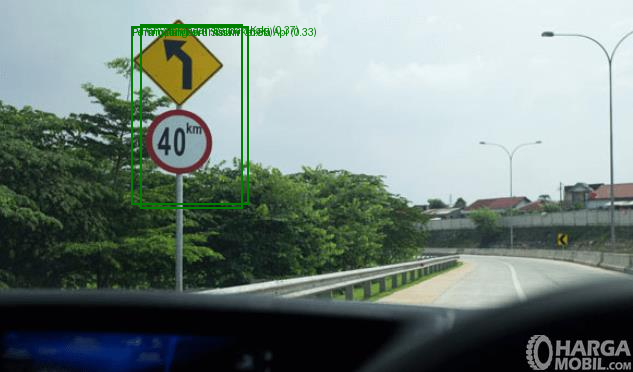


✅ Kelas terdeteksi:
- Penyebrangan Pejalan Kaki (0.37)
- Persimpangan 3 Sisi Kiri (0.35)
- Peringatan Perlintasan Kereta Api (0.33)


In [ ]:
upload_and_detect(model, device)

Penjelasan: Mengunggah gambar, mendeteksi objek di dalamnya menggunakan model, dan menampilkan hasil deteksi pada gambar.

In [ ]:
torch.save(model.state_dict(), "ssdlite_model_41class.pth")
print("Model disimpan sebagai ssdlite_model_41class.pth")

Model disimpan sebagai ssdlite_model_41class.pth


Penjelasan: Menyimpan model yang sudah dilatih ke dalam file dengan nama "ssdlite\_model\_41class.pth" dan mencetak pesan bahwa model telah berhasil disimpan.

## Tahap 6: Deployment
Tahap deployment adalah tahap akhir di mana model yang telah dilatih dan dievaluasi diimplementasikan dalam lingkungan produksi agar dapat digunakan oleh pengguna akhir.

Dalam proyek ini, proses deployment melibatkan prediksi terhadap gambar baru, baik yang sudah ada dalam dataset atau gambar yang diunggah oleh pengguna. Proses ini mencakup prediksi dan visualisasi hasil deteksi.

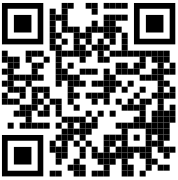